# Dataset de las señales ECG obtenidas anteriormente en 3 categorias: Basal, Respiracion y Post-Ejercicio

In [ ]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

## Lectura de Datos

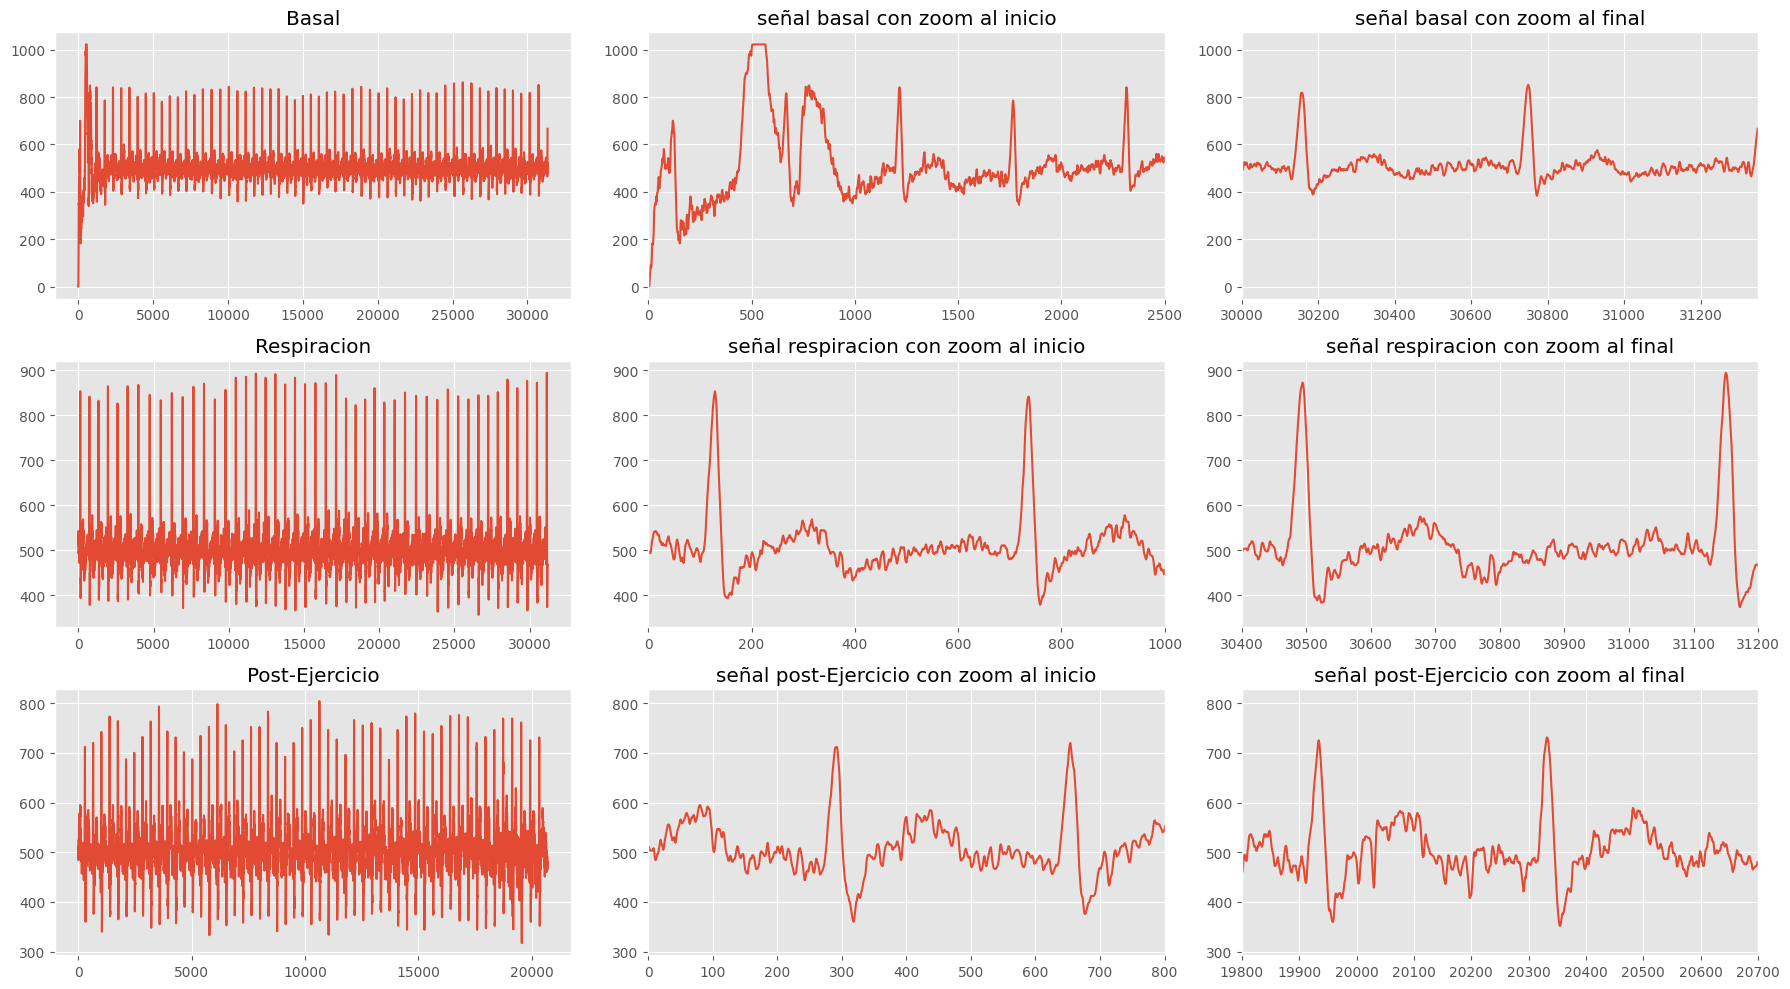

In [ ]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Basal_ECG.txt", delimiter="\t")
array2 = np.genfromtxt("Aguantando_respiracion_ECG.txt", delimiter="\t")
array3 = np.genfromtxt("Post_ejercicio_ECG.txt", delimiter="\t")

#Nos quedamos con el dato del sensor
basal_sensor = array1[:,-2]
resp_sensor = array2[:,-2]
ejer_sensor = array3[:,-2]

#Graficamos las señales iniciales
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(basal_sensor)
axs[0, 0].set_title('Basal')
axs[0, 0].grid(True)

axs[0, 1].plot(basal_sensor)
axs[0, 1].set_title('señal basal con zoom al inicio')
axs[0, 1].set_xlim(0, 2500)
axs[0, 1].grid(True)

axs[0, 2].plot(basal_sensor)
axs[0, 2].set_title('señal basal con zoom al final')
axs[0, 2].set_xlim(30000, len(basal_sensor))
axs[0, 2].grid(True)

axs[1, 0].plot(resp_sensor)
axs[1, 0].set_title('Respiracion')
axs[1, 0].grid(True)

axs[1, 1].plot(resp_sensor)
axs[1, 1].set_title('señal respiracion con zoom al inicio')
axs[1, 1].set_xlim(0, 1000)
axs[1, 1].grid(True)

axs[1, 2].plot(resp_sensor)
axs[1, 2].set_title('señal respiracion con zoom al final')
axs[1, 2].set_xlim(30400, len(resp_sensor))
axs[1, 2].grid(True)

axs[2, 0].plot(ejer_sensor)
axs[2, 0].set_title('Post-Ejercicio')
axs[2, 0].grid(True)

axs[2, 1].plot(ejer_sensor)
axs[2, 1].set_title('señal post-Ejercicio con zoom al inicio')
axs[2, 1].set_xlim(0, 800)
axs[2, 1].grid(True)

axs[2, 2].plot(ejer_sensor)
axs[2, 2].set_title('señal post-Ejercicio con zoom al final')
axs[2, 2].set_xlim(19800, len(ejer_sensor))
axs[2, 2].grid(True)

plt.tight_layout()

## Graficando FFT señales

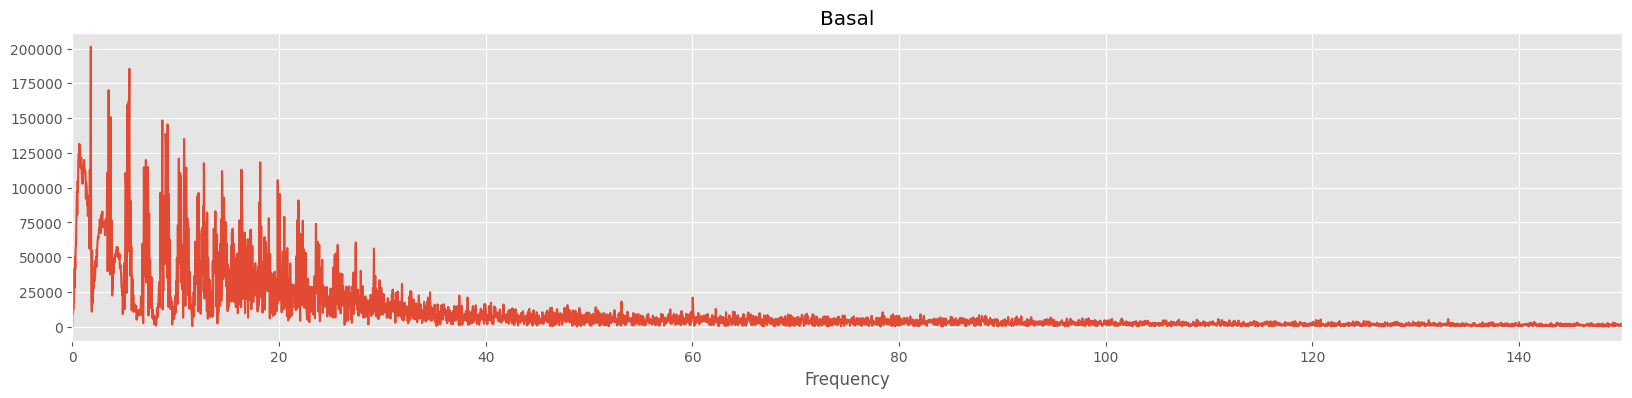

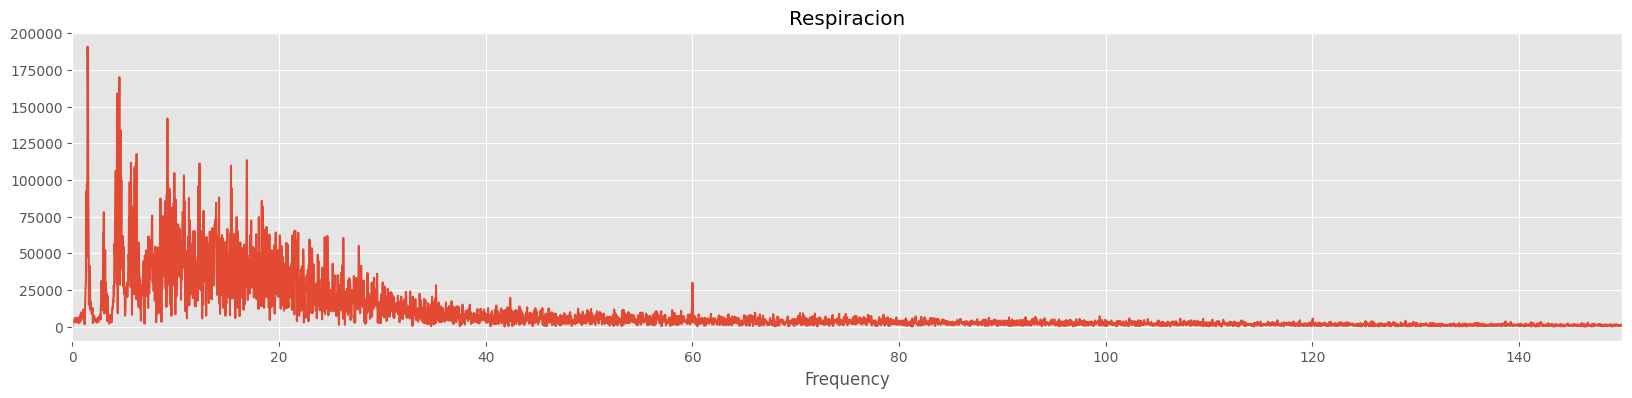

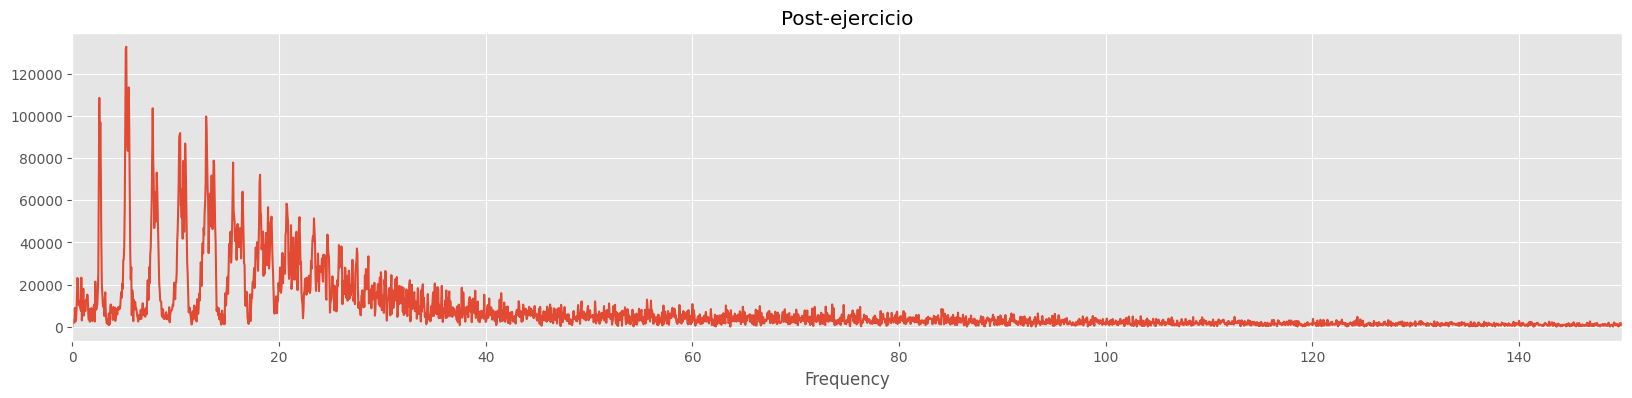

In [ ]:
def plot_FFT(signal, n_signal, Fs, plot_title, plot_xlim):
    N = len(n_signal)
    X = np.fft.fft(signal, N)
    
    X = X[0:N//2]
    F = np.linspace(0, Fs/2, N//2)
    
    Xm = np.abs(X)
    Xm = np.round(Xm,3)
    Xm[0] = 0
    
    plt.figure(figsize=(20, 4))
    plt.plot(F,Xm)
    plt.title(plot_title)
    plt.xlabel("Frequency")
    plt.xlim(0, plot_xlim)
    return X

Fs = 1000

n_basal = np.arange(0,basal_sensor.shape[0])
n_resp = np.arange(0,resp_sensor.shape[0])
n_ejer = np.arange(0,ejer_sensor.shape[0])

FFT_basal = plot_FFT(basal_sensor, n_basal, Fs, 'Basal', 150)
FFT_resp = plot_FFT(resp_sensor, n_resp, Fs, 'Respiracion', 150)
FFT_ejer = plot_FFT(ejer_sensor, n_ejer, Fs, 'Post-ejercicio', 150)

# Filtrando señales (FIR)

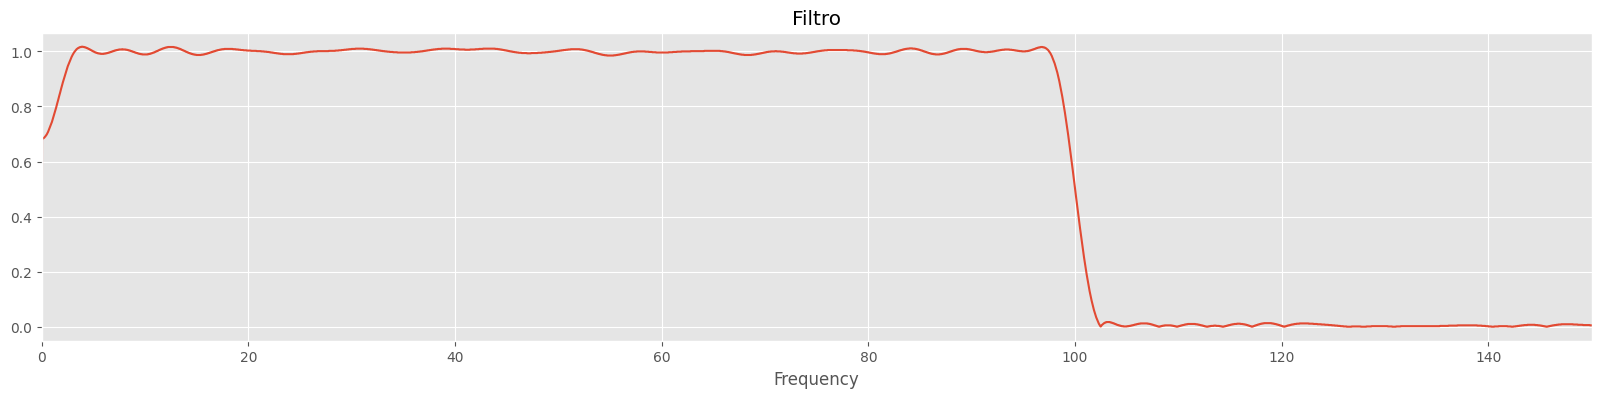

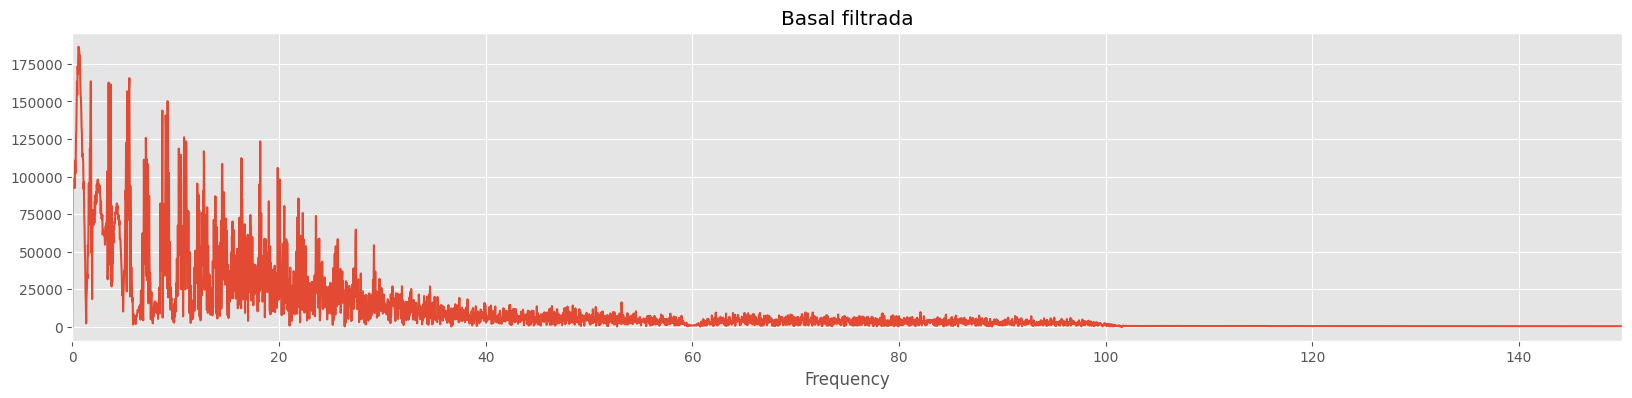

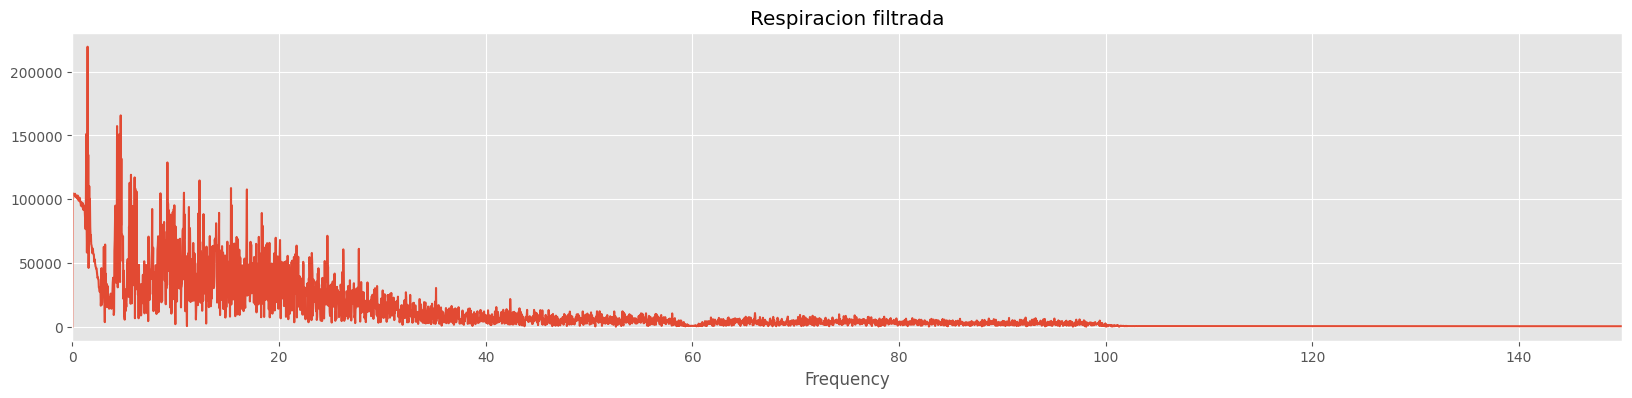

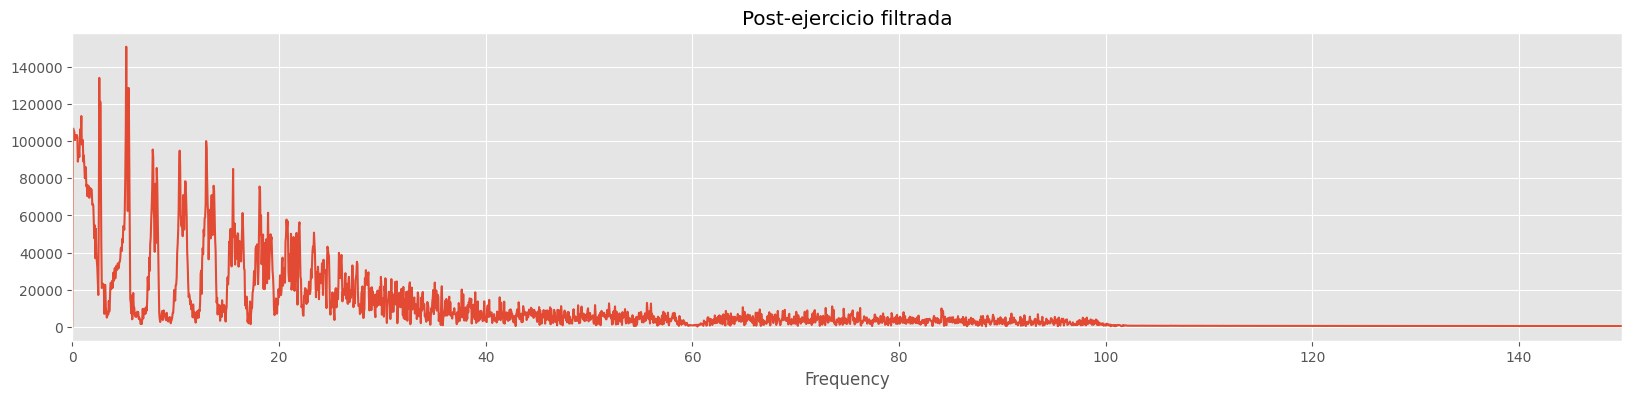

In [ ]:
import scipy.signal as sig

#Se utilizo esta longitud de la ventana, principalmente por su precision a las frecuencias bajas, ya que por bibliografia las señales de ruido de un ECG
#son menores a 0.5Hz y mayores a 100Hz
M = 601

def filtro_FIR(M, Fs, f1, f2, signal):
    #Filtro FIR
    w = sig.firwin(numtaps=M, fs=Fs, pass_zero=False, cutoff=[f1,f2], window='hamming')
    w = np.round(w,3)
    y = sig.lfilter(w, np.array(1),signal)
    
    #Coeficientes para el filtro notch que filtrada el ruido electrico w0=60Hz, con un factor de calidad Q=w0/bw, si queremos un ancho de banda de 2Hz -> Q=30
    b, a = sig.iirnotch(w0=60, Q=30, fs=Fs)  
     
    #Filtramos el ruido electrico que se encuentra en 60Hz
    y = sig.filtfilt(b, a, y)
    
    return y, w

filtro = filtro_FIR(M, Fs, 0.5, 100, basal_sensor)[1]
plot_filtro = plot_FFT(filtro, n_basal, Fs, 'Filtro', 150)

basal_fir = filtro_FIR(M, Fs, 0.5, 100, basal_sensor)[0]
FFT_basalFIR = plot_FFT(basal_fir, n_basal, Fs, 'Basal filtrada', 150)

resp_fir = filtro_FIR(M, Fs, 0.5, 100, resp_sensor)[0]
FFT_respFIR = plot_FFT(resp_fir, n_resp, Fs, 'Respiracion filtrada', 150)

ejer_fir = filtro_FIR(M, Fs, 0.5, 100, ejer_sensor)[0]
FFT_ejerFIR = plot_FFT(ejer_fir, n_ejer, Fs, 'Post-ejercicio filtrada', 150)

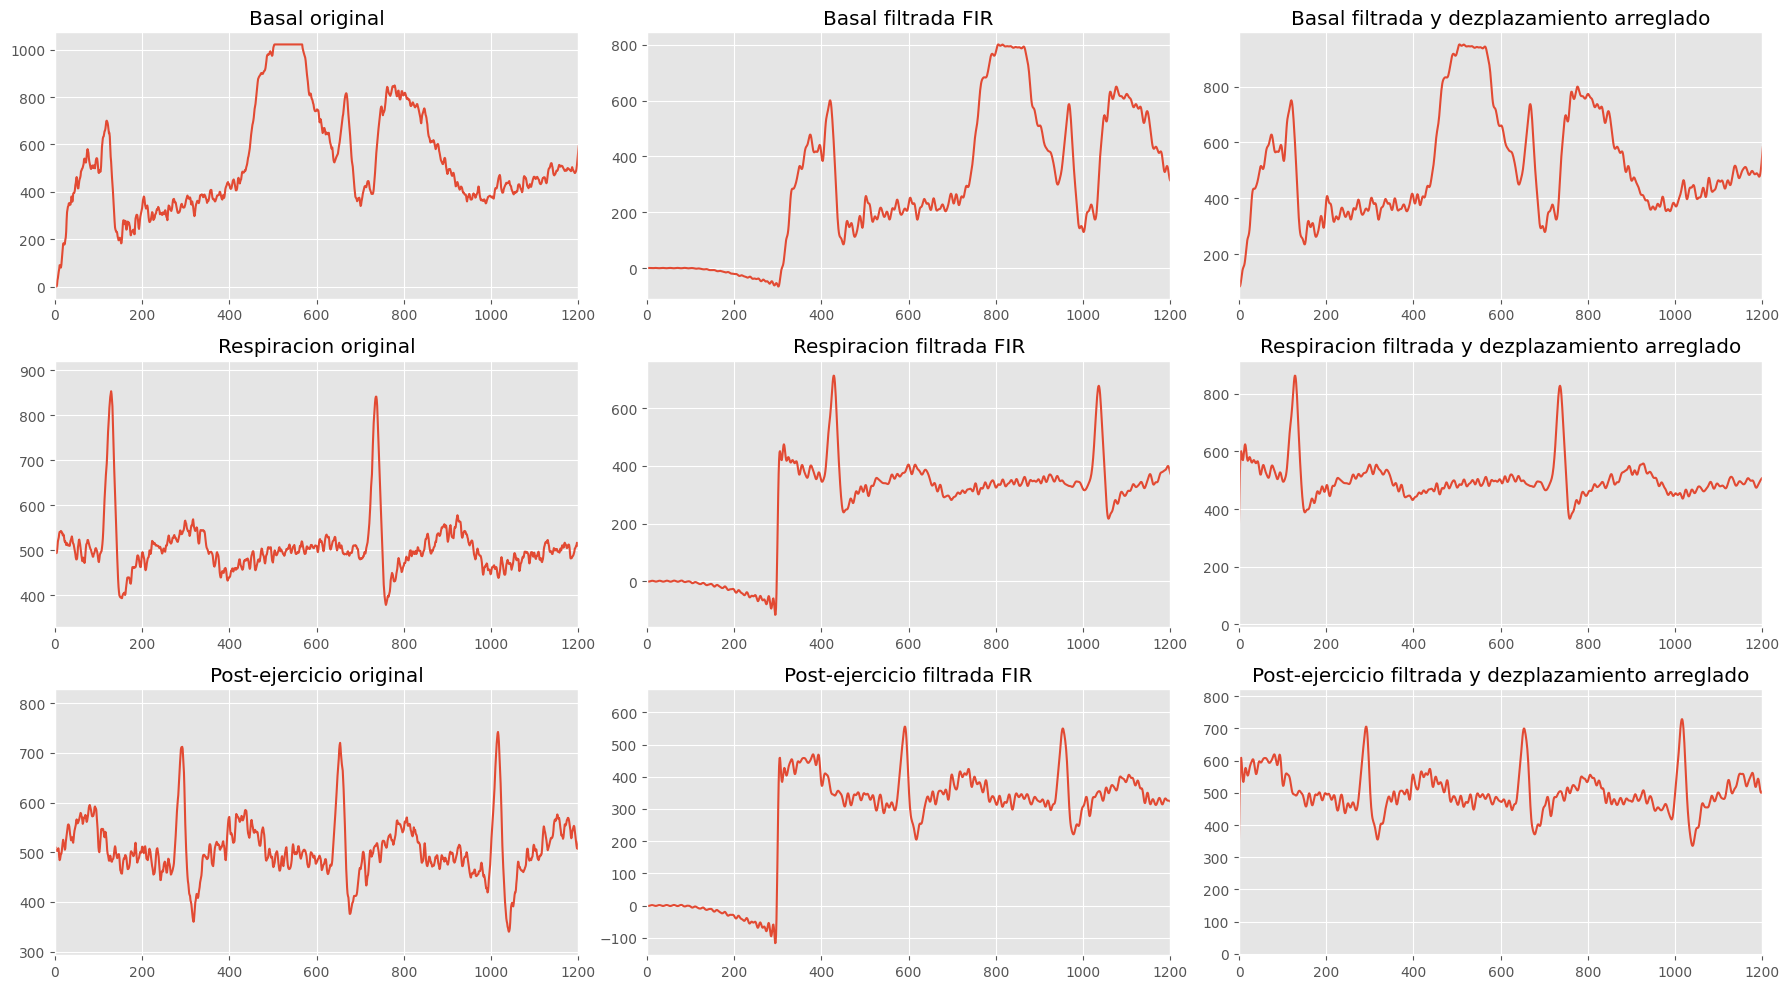

In [ ]:
def subplots(fil, n_signal, signal_sensor, signal_fir, t1, t2, t3, xlim, M):
    axs[fil,0].plot(n_signal, signal_sensor)
    axs[fil,0].set_xlim(0,xlim)
    axs[fil,0].set_title(t1)
    axs[fil,0].grid(True)

    axs[fil,1].plot(n_signal, signal_fir)
    axs[fil,1].set_xlim(0,xlim)
    axs[fil,1].set_title(t2)
    axs[fil,1].grid(True)

    axs[fil,2].plot(n_signal-(M//2), signal_fir+(M//4)) #Arreglamos el desplazamiento con la siguiente relacion: restandole en el eje x: M/2 y sumandole en el eje y: M/4
    axs[fil,2].set_xlim(0,xlim)
    axs[fil,2].set_title(t3)
    axs[fil,2].grid(True)

#Comparamos y arreglamos las senales
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)
subplots(0, n_basal, basal_sensor, basal_fir, 'Basal original', 'Basal filtrada FIR', 'Basal filtrada y dezplazamiento arreglado', 1200, M)
subplots(1, n_resp, resp_sensor, resp_fir, 'Respiracion original', 'Respiracion filtrada FIR', 'Respiracion filtrada y dezplazamiento arreglado', 1200, M)
subplots(2, n_ejer, ejer_sensor, ejer_fir, 'Post-ejercicio original', 'Post-ejercicio filtrada FIR', 'Post-ejercicio filtrada y dezplazamiento arreglado', 1200, M)

plt.tight_layout()

# Filtrando señales (IIR)

C:\Users\Angel\AppData\Local\Temp\ipykernel_13316\3495433585.py:14: RuntimeWarning: divide by zero encountered in log10
  db = 20 * np.log10(abs(h))


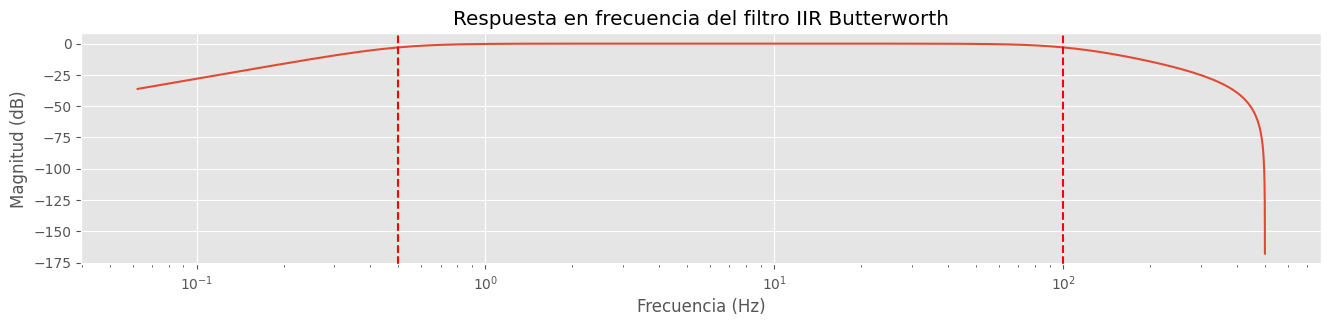

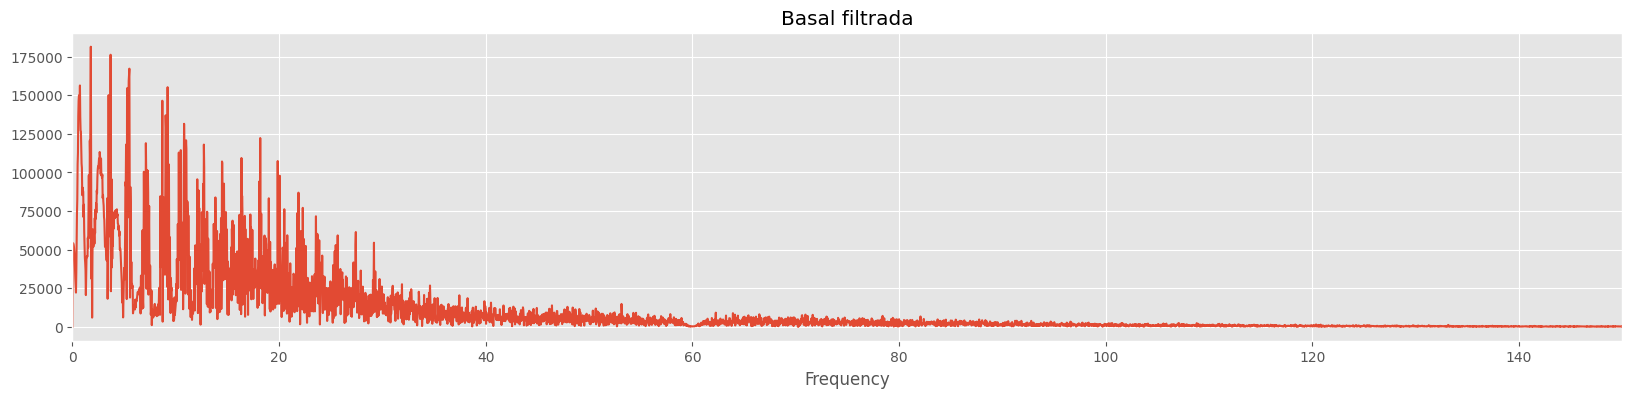

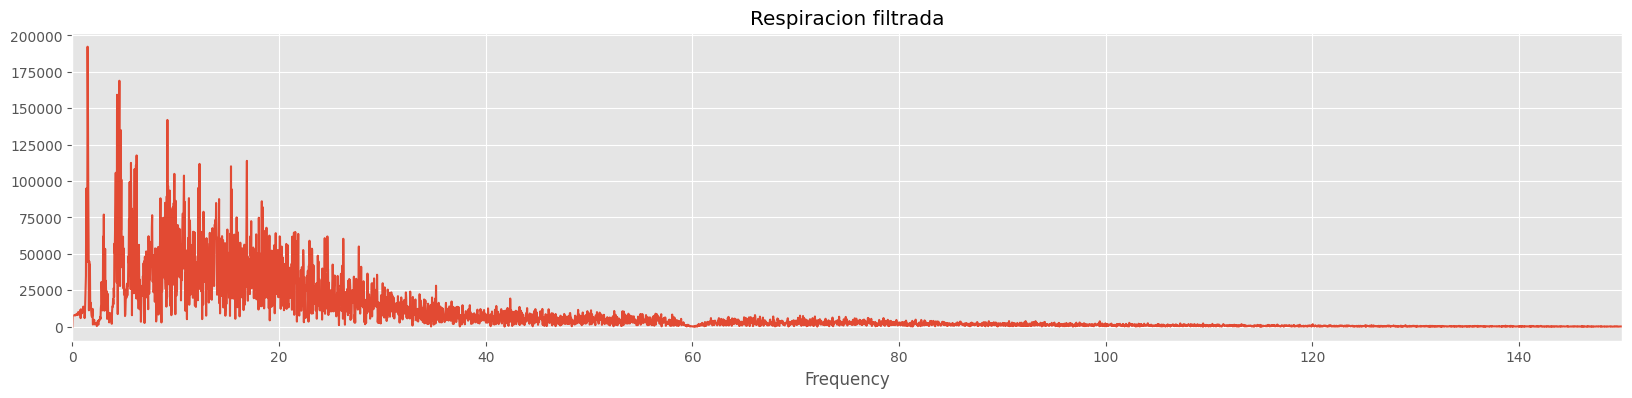

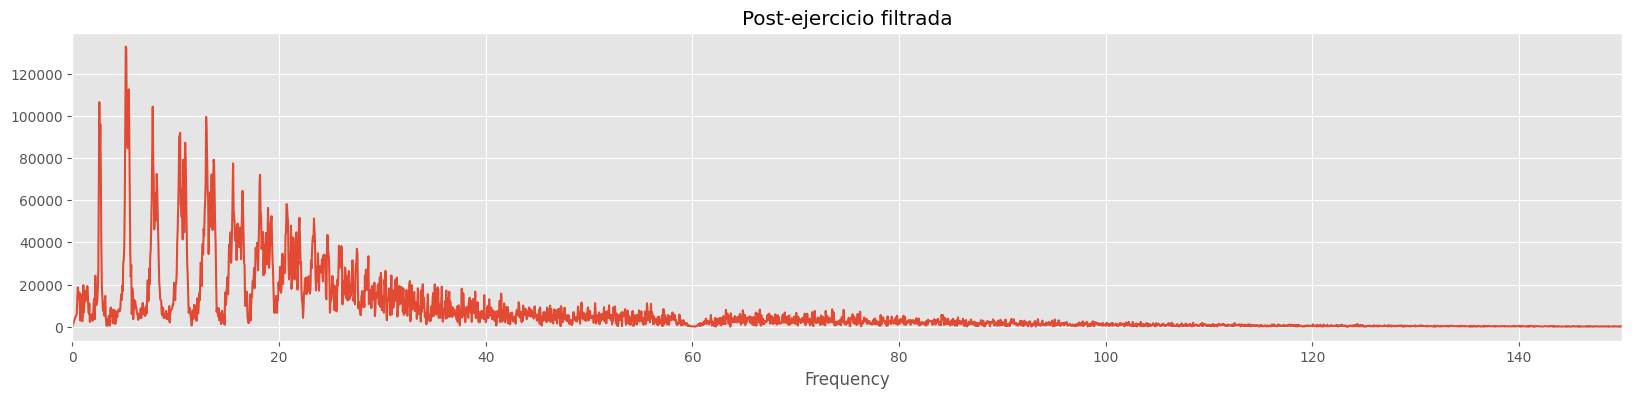

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#Especificaciones del filtro
fc1 = 0.5  # frecuencia de corte inferior
fc2 = 100  # frecuencia de corte superior
order = 2  # orden del filtro

#Diseñar filtro
b, a = signal.butter(order, [fc1/(Fs/2), fc2/(Fs/2)], btype='bandpass')
w, h = signal.freqz(b, a, worN=8000)
f = w / (2 * np.pi) * fs
db = 20 * np.log10(abs(h))

#Gráfico de respuesta en frecuencia del filtro
fig, ax = plt.subplots(figsize=(16,3))
ax.plot(f, db)
ax.set_xscale('log')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Magnitud (dB)')
ax.set_title('Respuesta en frecuencia del filtro IIR Butterworth')
ax.axvline(x=fc1, color='r', linestyle='--')
ax.axvline(x=fc2, color='r', linestyle='--')
plt.show()

#Aplicando filtro IIR
basal_iir = sig.filtfilt(b, a, basal_sensor)
resp_iir = signal.filtfilt(b, a, resp_sensor)
ejer_iir = signal.filtfilt(b, a, ejer_sensor)


#Coeficientes para el filtro notch que filtrada el ruido electrico w0=60Hz, con un factor de calidad Q=w0/bw, si queremos un ancho de banda de 2Hz -> Q=30
bn, an = sig.iirnotch(w0=60, Q=30, fs=Fs)  
     
#Filtramos el ruido electrico que se encuentra en 60Hz
basal_iir = sig.filtfilt(bn, an, basal_iir)
FFT_basalIIR = plot_FFT(basal_iir, n_basal, Fs, 'Basal filtrada', 150)

resp_iir = sig.filtfilt(bn, an, resp_iir)
FFT_respIIR = plot_FFT(resp_iir, n_resp, Fs, 'Respiracion filtrada', 150)

ejer_iir = sig.filtfilt(bn, an, ejer_iir)
FFT_ejerIIR = plot_FFT(ejer_iir, n_ejer, Fs, 'Post-ejercicio filtrada', 150)

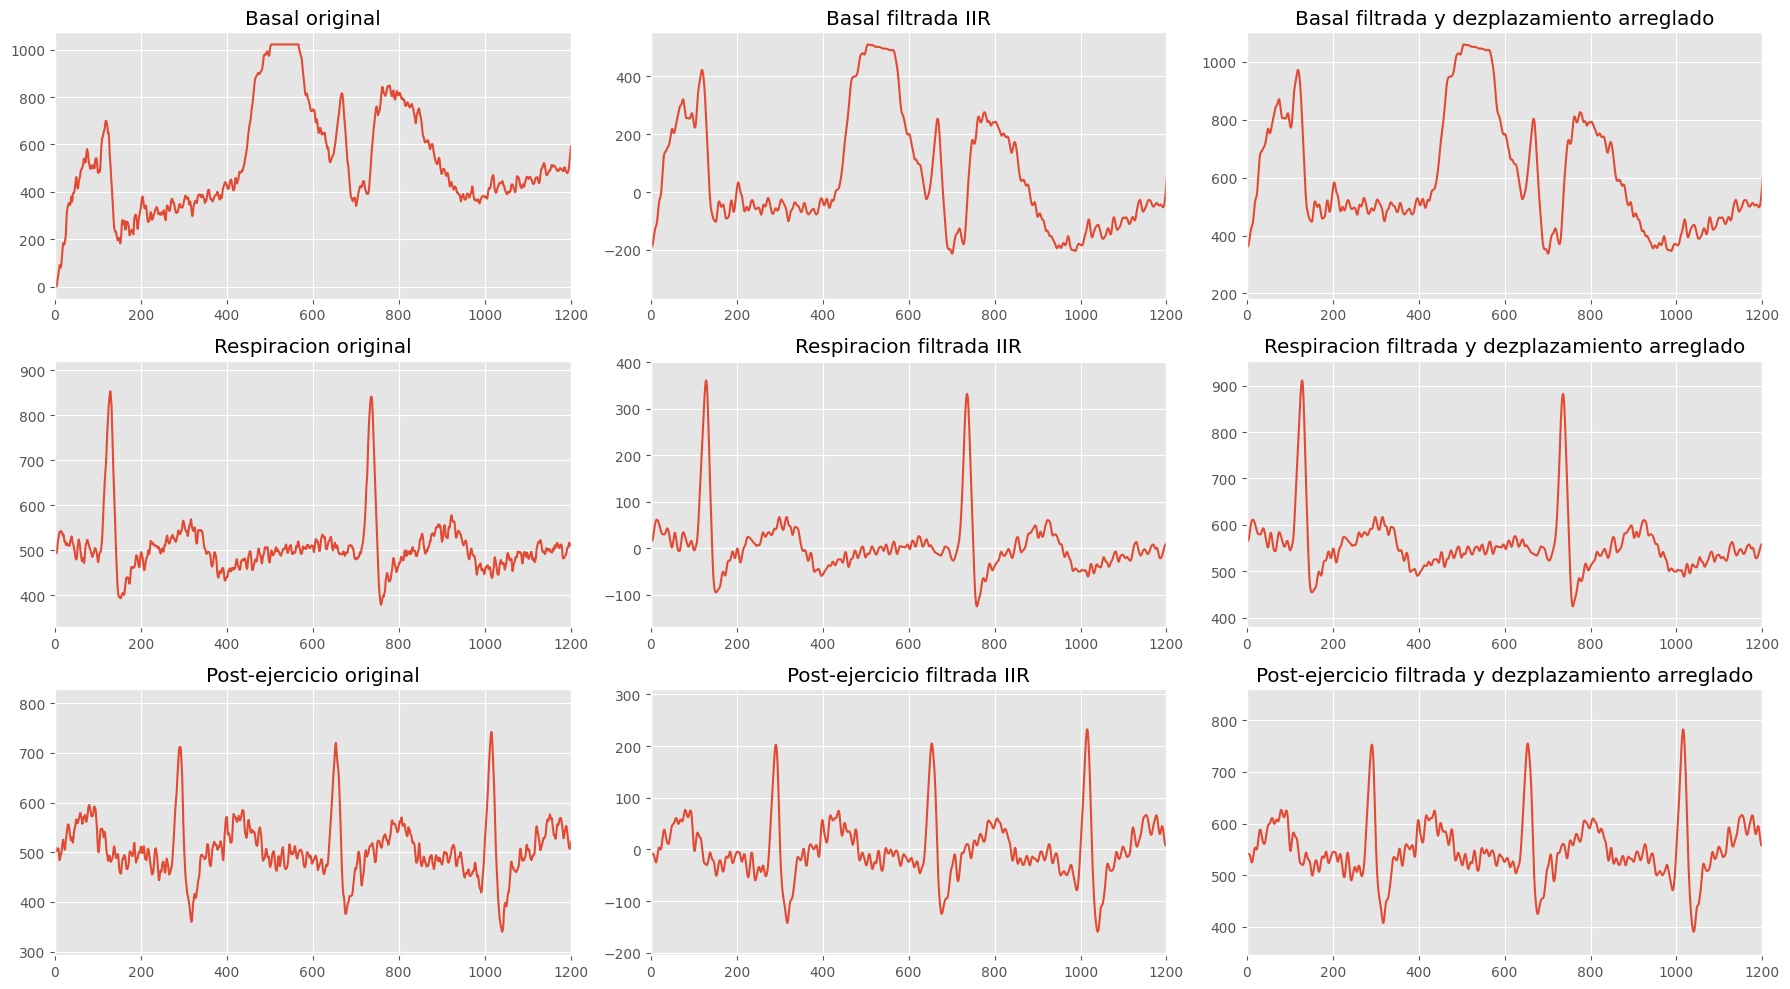

In [ ]:
def subplots(fil, n_signal, signal_sensor, signal_iir, t1, t2, t3, xlim):
    axs[fil,0].plot(n_signal, signal_sensor)
    axs[fil,0].set_xlim(0,xlim)
    axs[fil,0].set_title(t1)
    axs[fil,0].grid(True)

    axs[fil,1].plot(n_signal, signal_iir)
    axs[fil,1].set_xlim(0,xlim)
    axs[fil,1].set_title(t2)
    axs[fil,1].grid(True)

    axs[fil,2].plot(n_signal, signal_iir+550) #Arreglamos el desplazamiento sumando 550 en el eje y
    axs[fil,2].set_xlim(0,xlim)
    axs[fil,2].set_title(t3)
    axs[fil,2].grid(True)

#Comparamos y arreglamos las senales
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)
subplots(0, n_basal, basal_sensor, basal_iir, 'Basal original', 'Basal filtrada IIR', 'Basal filtrada y dezplazamiento arreglado', 1200)
subplots(1, n_resp, resp_sensor, resp_iir, 'Respiracion original', 'Respiracion filtrada IIR', 'Respiracion filtrada y dezplazamiento arreglado', 1200)
subplots(2, n_ejer, ejer_sensor, ejer_iir, 'Post-ejercicio original', 'Post-ejercicio filtrada IIR', 'Post-ejercicio filtrada y dezplazamiento arreglado', 1200)

plt.tight_layout()

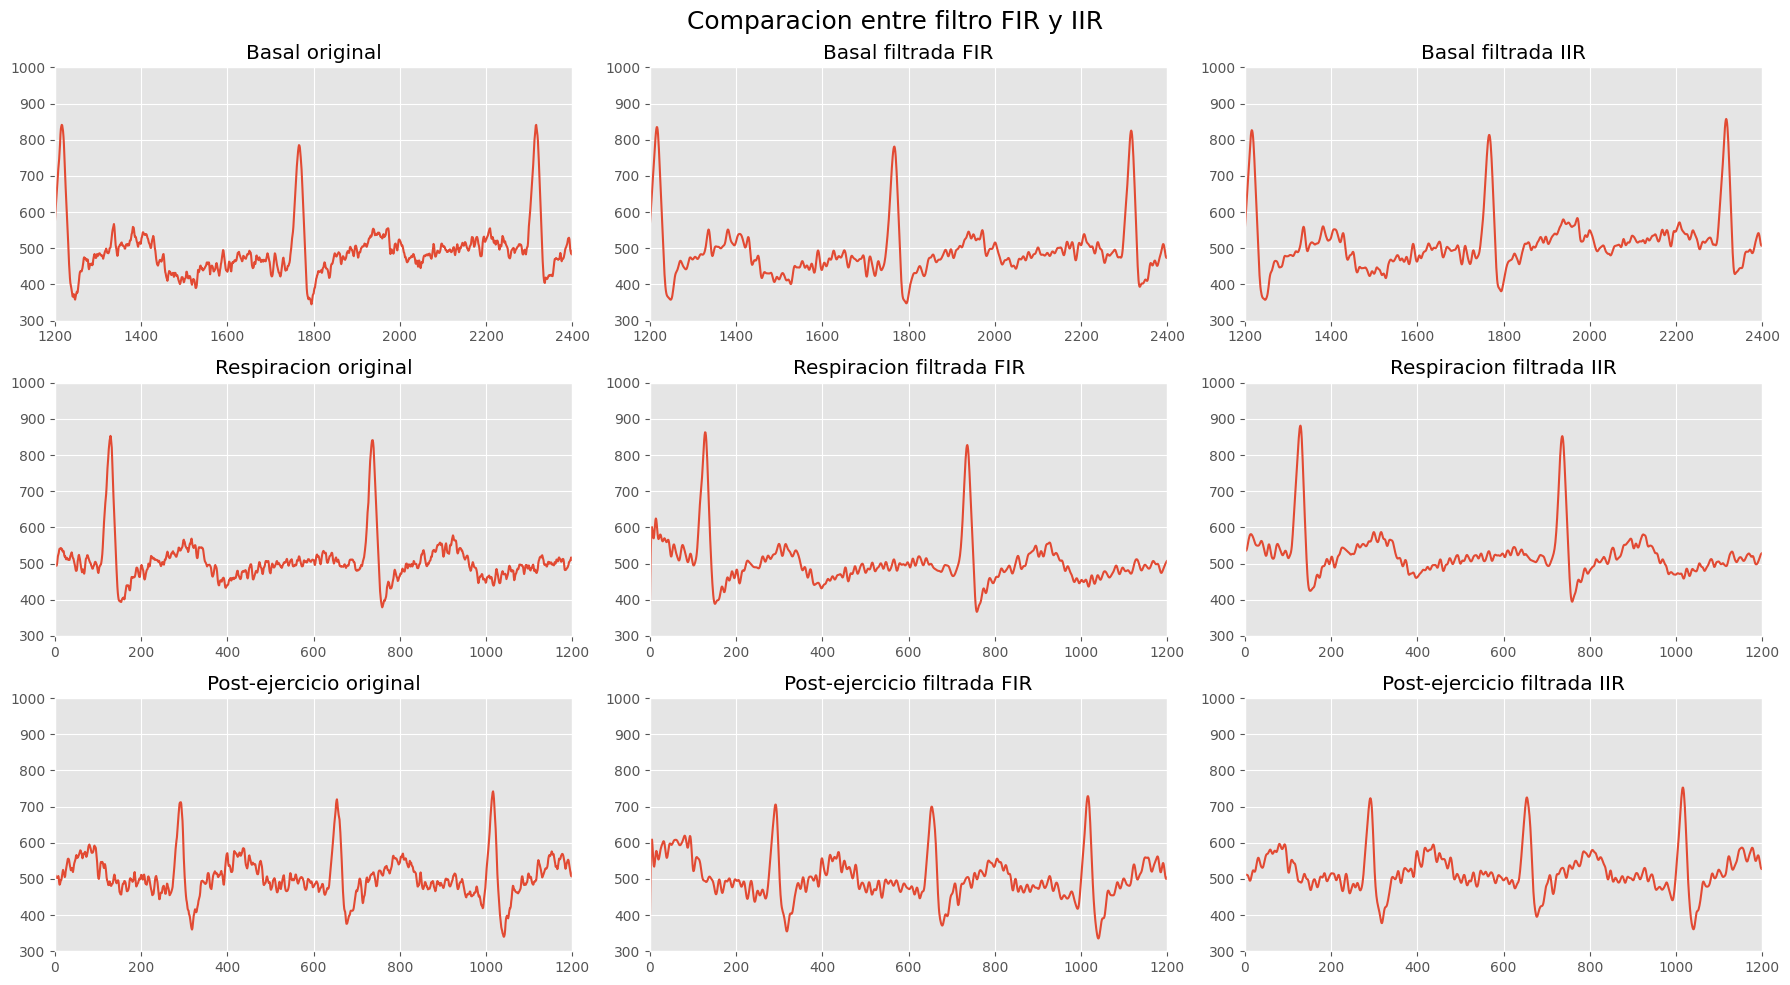

In [ ]:
def subplots(fil, n_signal, signal_sensor, signal_iir, signal_fir, t1, t2, t3, xlim1, xlim2, M):
    axs[fil,0].plot(n_signal, signal_sensor)
    axs[fil,0].set_xlim(xlim1,xlim2)
    axs[fil,0].set_ylim(300,1000)
    axs[fil,0].set_title(t1)
    axs[fil,0].grid(True)

    axs[fil,1].plot(n_signal-(M//2), signal_fir+(M//4))
    axs[fil,1].set_xlim(xlim1,xlim2)
    axs[fil,1].set_ylim(300,1000)
    axs[fil,1].set_title(t2)
    axs[fil,1].grid(True)

    axs[fil,2].plot(n_signal, signal_iir+520)
    axs[fil,2].set_xlim(xlim1,xlim2)
    axs[fil,2].set_ylim(300,1000)
    axs[fil,2].set_title(t3)
    axs[fil,2].grid(True)

#Comparamos y arreglamos las senales
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Comparacion entre filtro FIR y IIR', fontsize=18)
subplots(0, n_basal, basal_sensor, basal_iir, basal_fir, 'Basal original', 'Basal filtrada FIR', 'Basal filtrada IIR',1200, 2400, M)
subplots(1, n_resp, resp_sensor, resp_iir, resp_fir, 'Respiracion original', 'Respiracion filtrada FIR', 'Respiracion filtrada IIR', 0, 1200, M)
subplots(2, n_ejer, ejer_sensor, ejer_iir, ejer_fir, 'Post-ejercicio original', 'Post-ejercicio filtrada FIR', 'Post-ejercicio filtrada IIR', 0, 1200, M)

plt.tight_layout()


## Recorte de señal

Para el recorte se uso la señal filtrada con el filtro FIR

### 1. Basal
Segun lo que se ve en la graficación de los datos, la señal original que se obtiene del sensor posee ruido por lo que se procede a recortar dicha señal. El primer punto de corte se hace en 2050, que es donde se empieza los ciclos cardiacos ademas se escoge ese punto ya que es donde aproximadamente empieza la onda P, se puede observar en la gráfica de la señal original que antes del punto que escogimos hay dos ciclos cardiacos, pero no se eligieron esos como ciclos iniciales ya que todavía pueden estar afectados por el ruido. El segundo punto de corte se hace en 30457, ya que es donde aproximadamente termina la onda T del penúltimo ciclo y empieza la onda P del último ciclo. Ha estos puntos escogidos de la señal original se resta lo desplazado por el filtro en el eje x. Ademas se suma lo desplazado en el eje y.

In [ ]:
# Recortamos la señal
basal_rec = basal_fir[2050+(M//2):30457+(M//2)]
basal_rec = basal_rec + (M//4)

### 2. Respiración
Segun lo que se ve en la graficación de los datos, la señal original que se obtiene del sensor no posee tanto ruido por lo que se hara pequenos recortes para tener puntos fijos de que parte del ciclo cardiaco empezara y terminara nuestra señal. El primer punto de corte se hace en 400, que es donde empieza la onda P del segundo ciclo cardiaco de nuestra señal, ya que el primer ciclo no esta tan claro. El segundo punto de corte se hace en 30829, ya que es donde aproximadamente termina la onda T del penultimo ciclo y empieza la onda P del ultimo ciclo. Ha estos puntos escogidos de la señal original se resta lo desplazado por el filtro en el eje x. Ademas se suma lo desplazado en el eje y.

In [ ]:
# Recortamos la señal
resp_rec = resp_fir[400+(M//2):30829+(M//2)]
resp_rec = resp_rec + (M//4)

### 3. Post-ejercicio
Segun lo que se ve en la graficacion de los datos, la señal original que se obtiene del sensor no posee tanto ruido por lo que se hara pequenos recortes para tener puntos fijos de que parte del ciclo cardiaco empezara y terminara nuestra señal. El primer punto de corte se hace en 500, que es donde empieza la onda P del segundo ciclo cardiaco de nuestra señal, para evitar pequenos ruidos que puede haber en el primer ciclo cardiaco que aparece en nuestra señal. El segundo punto de corte se hace en 20156, ya que es donde aproximadamente termina la onda T del penultimo ciclo y empieza la onda P del ultimo ciclo. Ha estos puntos escogidos de la señal original se resta lo desplazado por el filtro en el eje x. Ademas se suma lo desplazado en el eje y.

In [ ]:
# Recortamos la señal
ejer_rec = ejer_fir[500+(M//2):20156+(M//2)]
ejer_rec = ejer_rec + (M//4)

### Graficas de las señales recortadas

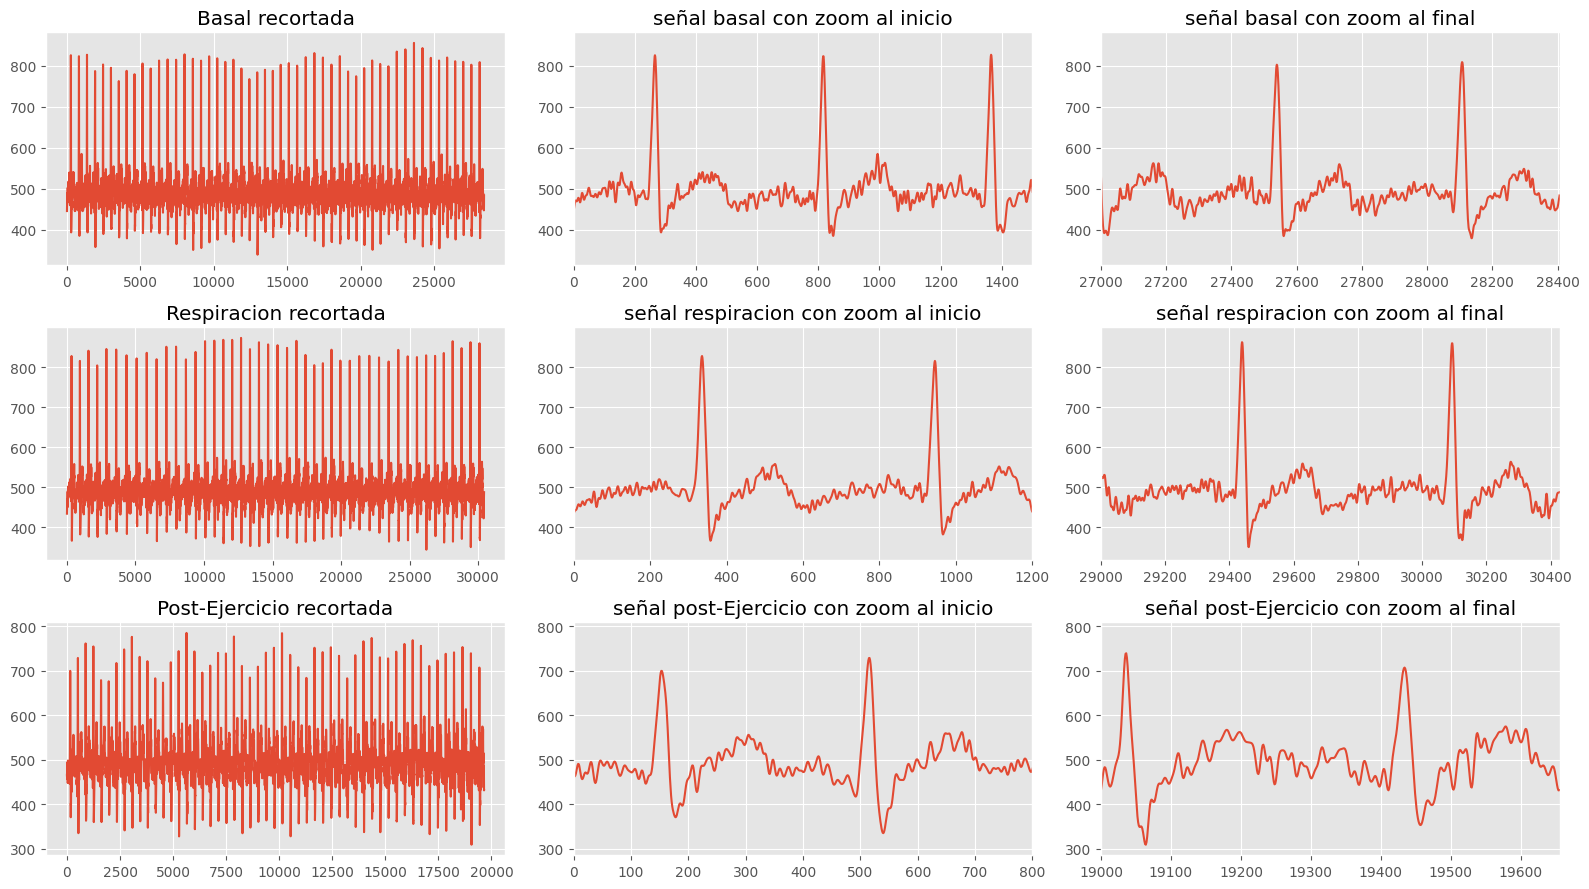

In [ ]:
#Graficamos las señales iniciales
fig, axs = plt.subplots(3, 3, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(basal_rec)
axs[0, 0].set_title('Basal recortada')
axs[0, 0].grid(True)

axs[0, 1].plot(basal_rec)
axs[0, 1].set_title('señal basal con zoom al inicio')
axs[0, 1].set_xlim(0, 1500)
axs[0, 1].grid(True)

axs[0, 2].plot(basal_rec)
axs[0, 2].set_title('señal basal con zoom al final')
axs[0, 2].set_xlim(27000, len(basal_rec))
axs[0, 2].grid(True)

axs[1, 0].plot(resp_rec)
axs[1, 0].set_title('Respiracion recortada')
axs[1, 0].grid(True)

axs[1, 1].plot(resp_rec)
axs[1, 1].set_title('señal respiracion con zoom al inicio')
axs[1, 1].set_xlim(0, 1200)
axs[1, 1].grid(True)

axs[1, 2].plot(resp_rec)
axs[1, 2].set_title('señal respiracion con zoom al final')
axs[1, 2].set_xlim(29000, len(resp_rec))
axs[1, 2].grid(True)

axs[2, 0].plot(ejer_rec)
axs[2, 0].set_title('Post-Ejercicio recortada')
axs[2, 0].grid(True)

axs[2, 1].plot(ejer_rec)
axs[2, 1].set_title('señal post-Ejercicio con zoom al inicio')
axs[2, 1].set_xlim(0, 800)
axs[2, 1].grid(True)

axs[2, 2].plot(ejer_rec)
axs[2, 2].set_title('señal post-Ejercicio con zoom al final')
axs[2, 2].set_xlim(19000, len(ejer_rec))
axs[2, 2].grid(True)

plt.tight_layout()

## Especificar la Frecuencia de muestreo

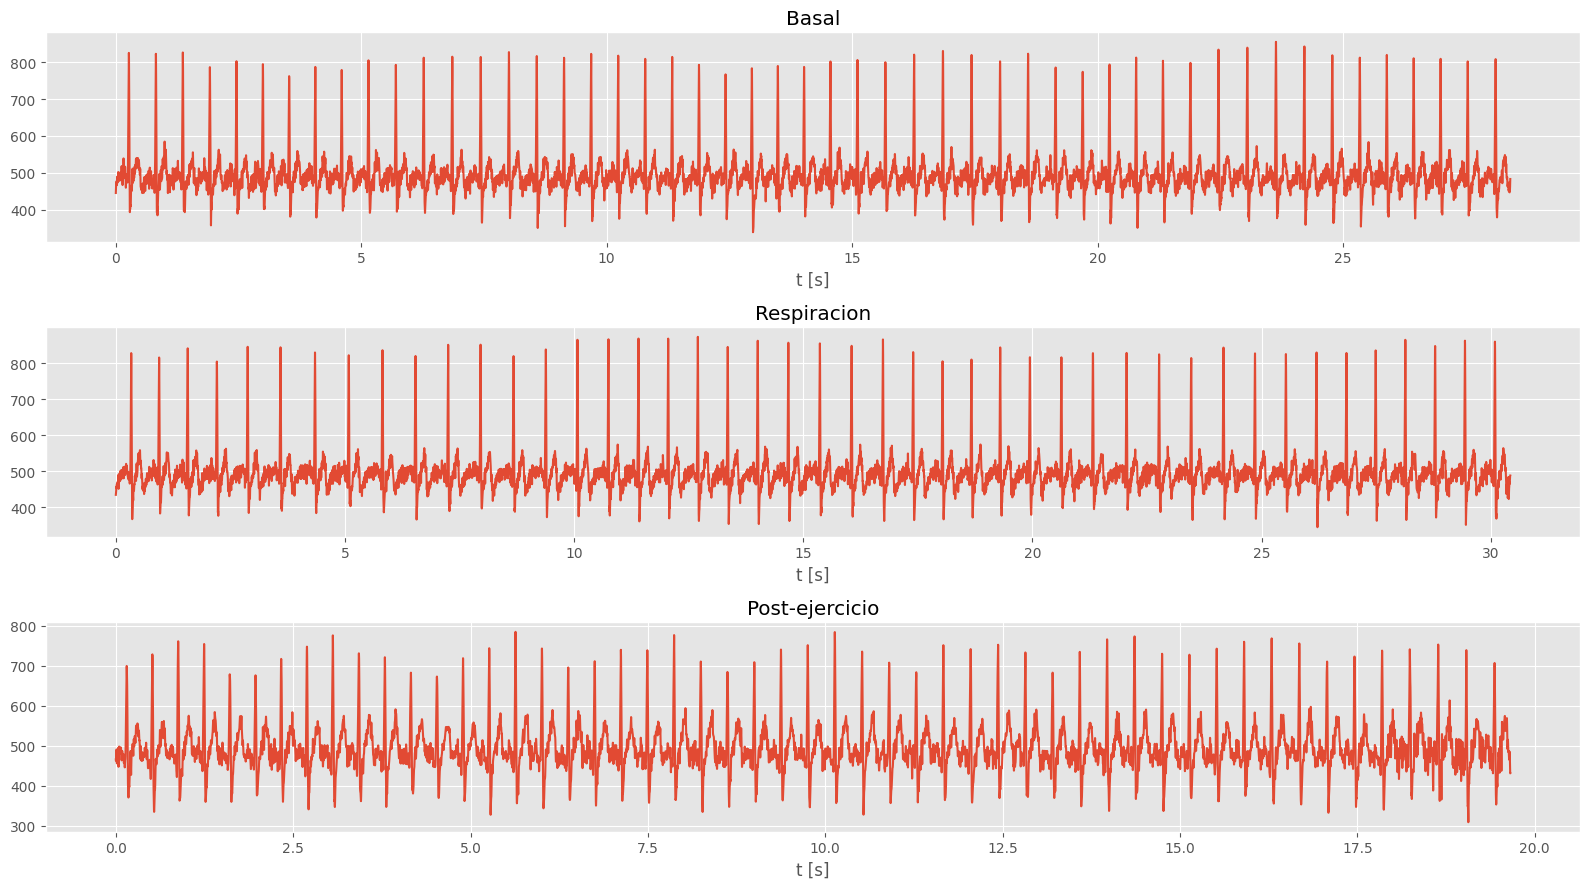

In [ ]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts = 1/Fs

#Basal
n_basal = np.arange(0,basal_rec.shape[0])  # t = n*Ts
t_basal = n_basal*Ts

#Respiracion
n_resp = np.arange(0,resp_rec.shape[0])  # t = n*Ts
t_resp = n_resp*Ts

#Post-ejercicio
n_ejer = np.arange(0,ejer_rec.shape[0])  # t = n*Ts
t_ejer = n_ejer*Ts

#Ploteamos la señal en el tiempo
fig, axs = plt.subplots(3, 1, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

axs[0].plot(t_basal, basal_rec)
axs[0].set_title('Basal')
axs[0].set_xlabel('t [s]')
axs[0].grid(True)

axs[1].plot(t_resp, resp_rec)
axs[1].set_title('Respiracion')
axs[1].set_xlabel('t [s]')
axs[1].grid(True)

axs[2].plot(t_ejer, ejer_rec)
axs[2].set_title('Post-ejercicio')
axs[2].set_xlabel('t [s]')
axs[2].grid(True)

plt.tight_layout()

## Pasando el array a pandas para trabajarlo como series de tiempo

In [ ]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_basal = np.concatenate((t_basal.reshape(-1,1),  basal_rec.reshape(-1,1)), axis=1) #Basal
st_resp = np.concatenate((t_resp.reshape(-1,1),  resp_rec.reshape(-1,1)), axis=1) #Respiracion
st_ejer = np.concatenate((t_ejer.reshape(-1,1),  ejer_rec.reshape(-1,1)), axis=1) #Post-ejercicio

#Creamos el data frame con las varibles t y d_sensor
df_basal = pd.DataFrame(st_basal, columns=["t","basal_rec"]) #Basal
df_resp = pd.DataFrame(st_resp, columns=["t","resp_rec"]) #Respiracion
df_ejer = pd.DataFrame(st_ejer, columns=["t","ejer_rec"]) #Post-ejercicio

#Establecemos t como index 
df_basal = df_basal.set_index("t") #Basal
df_resp = df_resp.set_index("t") #Respiracion
df_ejer = df_ejer.set_index("t") #Post-ejercicio

## Obteniendo la duracion de un ciclo cardiaco

Se grafica la señal durante el primer segundo para tener una vista amplia y calcular aproximadamente cuanto tiempo dura un ciclo cardiaco. Y como se puede observar el ciclo cardiaco para el estado basal es 0.56 segundos, para el de respiracion es 0.63 segundos y para el de post-ejercicio es 0.37.

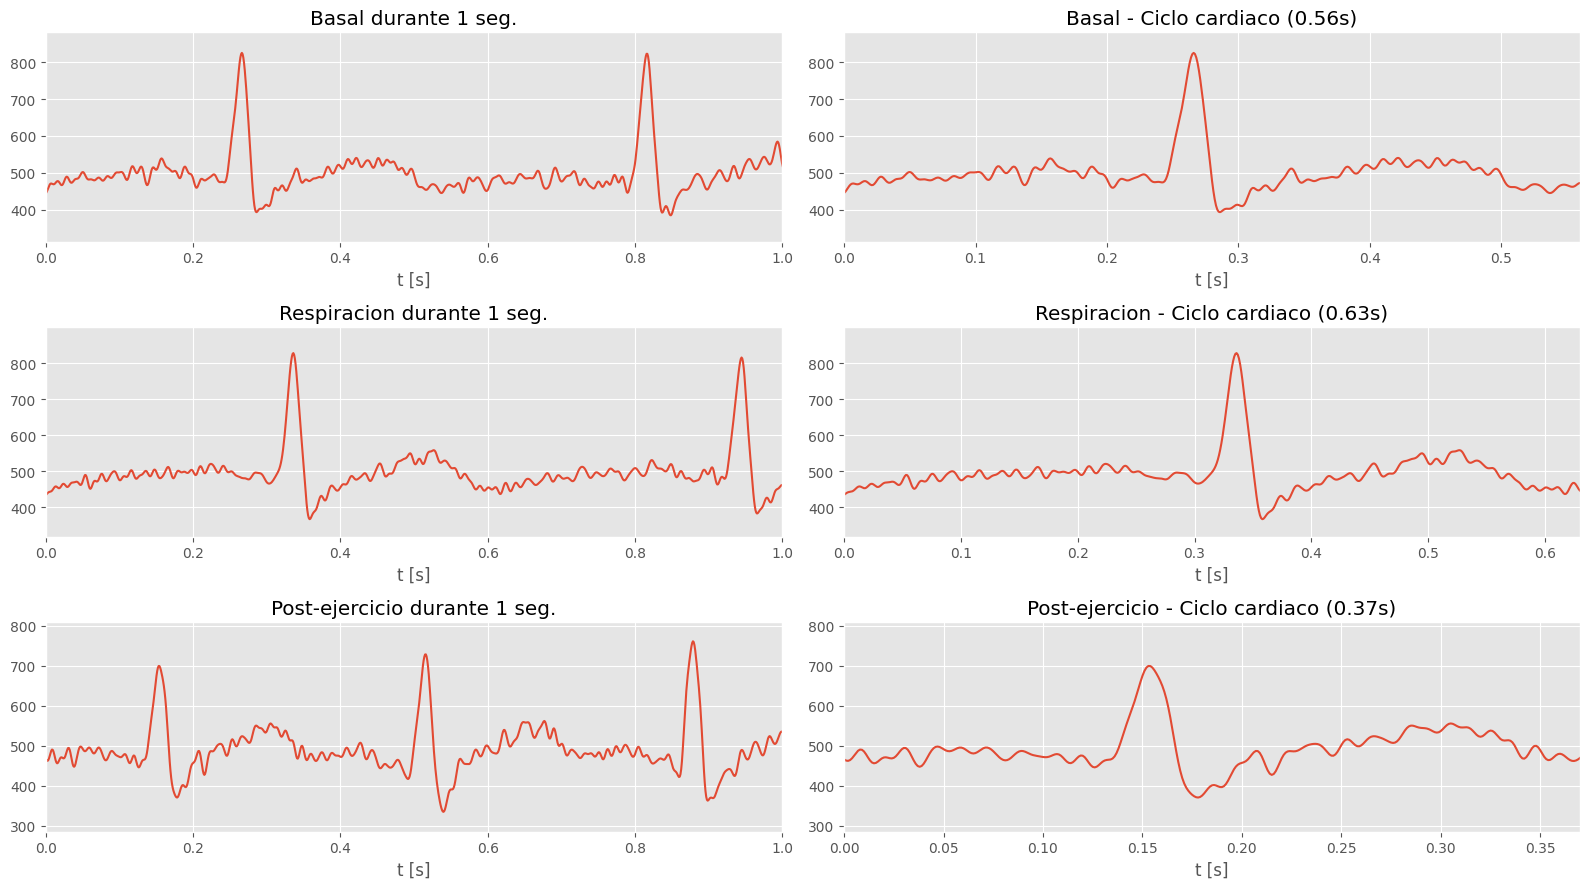

In [ ]:
#Ploteamos la señal
fig, axs = plt.subplots(3, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(df_basal)
axs[0, 0].set_title('Basal durante 1 seg.')
axs[0, 0].set_xlim(0, 1)
axs[0, 0].set_xlabel('t [s]')
axs[0, 0].grid(True)

axs[0, 1].plot(df_basal)
axs[0, 1].set_title('Basal - Ciclo cardiaco (0.56s)')
axs[0, 1].set_xlim(0, 0.56)
axs[0, 1].set_xlabel('t [s]')
axs[0, 1].grid(True)

axs[1, 0].plot(df_resp)
axs[1, 0].set_title('Respiracion durante 1 seg.')
axs[1, 0].set_xlim(0, 1)
axs[1, 0].set_xlabel('t [s]')
axs[1, 0].grid(True)

axs[1, 1].plot(df_resp)
axs[1, 1].set_title('Respiracion - Ciclo cardiaco (0.63s)')
axs[1, 1].set_xlim(0, 0.63)
axs[1, 1].set_xlabel('t [s]')
axs[1, 1].grid(True)

axs[2, 0].plot(df_ejer)
axs[2, 0].set_title('Post-ejercicio durante 1 seg.')
axs[2, 0].set_xlim(0, 1)
axs[2, 0].set_xlabel('t [s]')
axs[2, 0].grid(True)

axs[2, 1].plot(df_ejer)
axs[2, 1].set_title('Post-ejercicio - Ciclo cardiaco (0.37s)')
axs[2, 1].set_xlim(0, 0.37)
axs[2, 1].set_xlabel('t [s]')
axs[2, 1].grid(True)

plt.tight_layout()

## Pasando a data tabular estilo Sklearn

In [ ]:
import math

# Basal
x_basal = math.ceil(df_basal.index.max()/0.56)             #Redondeamos al numero mayor
y_basal = math.ceil(df_basal.shape[0]/x_basal)
tab_basal = df_basal[["basal_rec"]].values.reshape(x_basal,y_basal)

# Respiracion
x_resp = math.ceil(df_resp.index.max()/0.63)              #Redondeamos al numero mayor
y_resp = math.ceil(df_resp.shape[0]/x_resp)
tab_resp = df_resp[["resp_rec"]].values.reshape(x_resp,y_resp)

# Post-ejercicio
x_ejer = math.ceil(df_ejer.index.max()/0.37)              #Redondeamos al numero mayor
y_ejer = math.ceil(df_ejer.shape[0]/x_ejer)
tab_ejer = df_ejer[["ejer_rec"]].values.reshape(x_ejer,y_ejer)

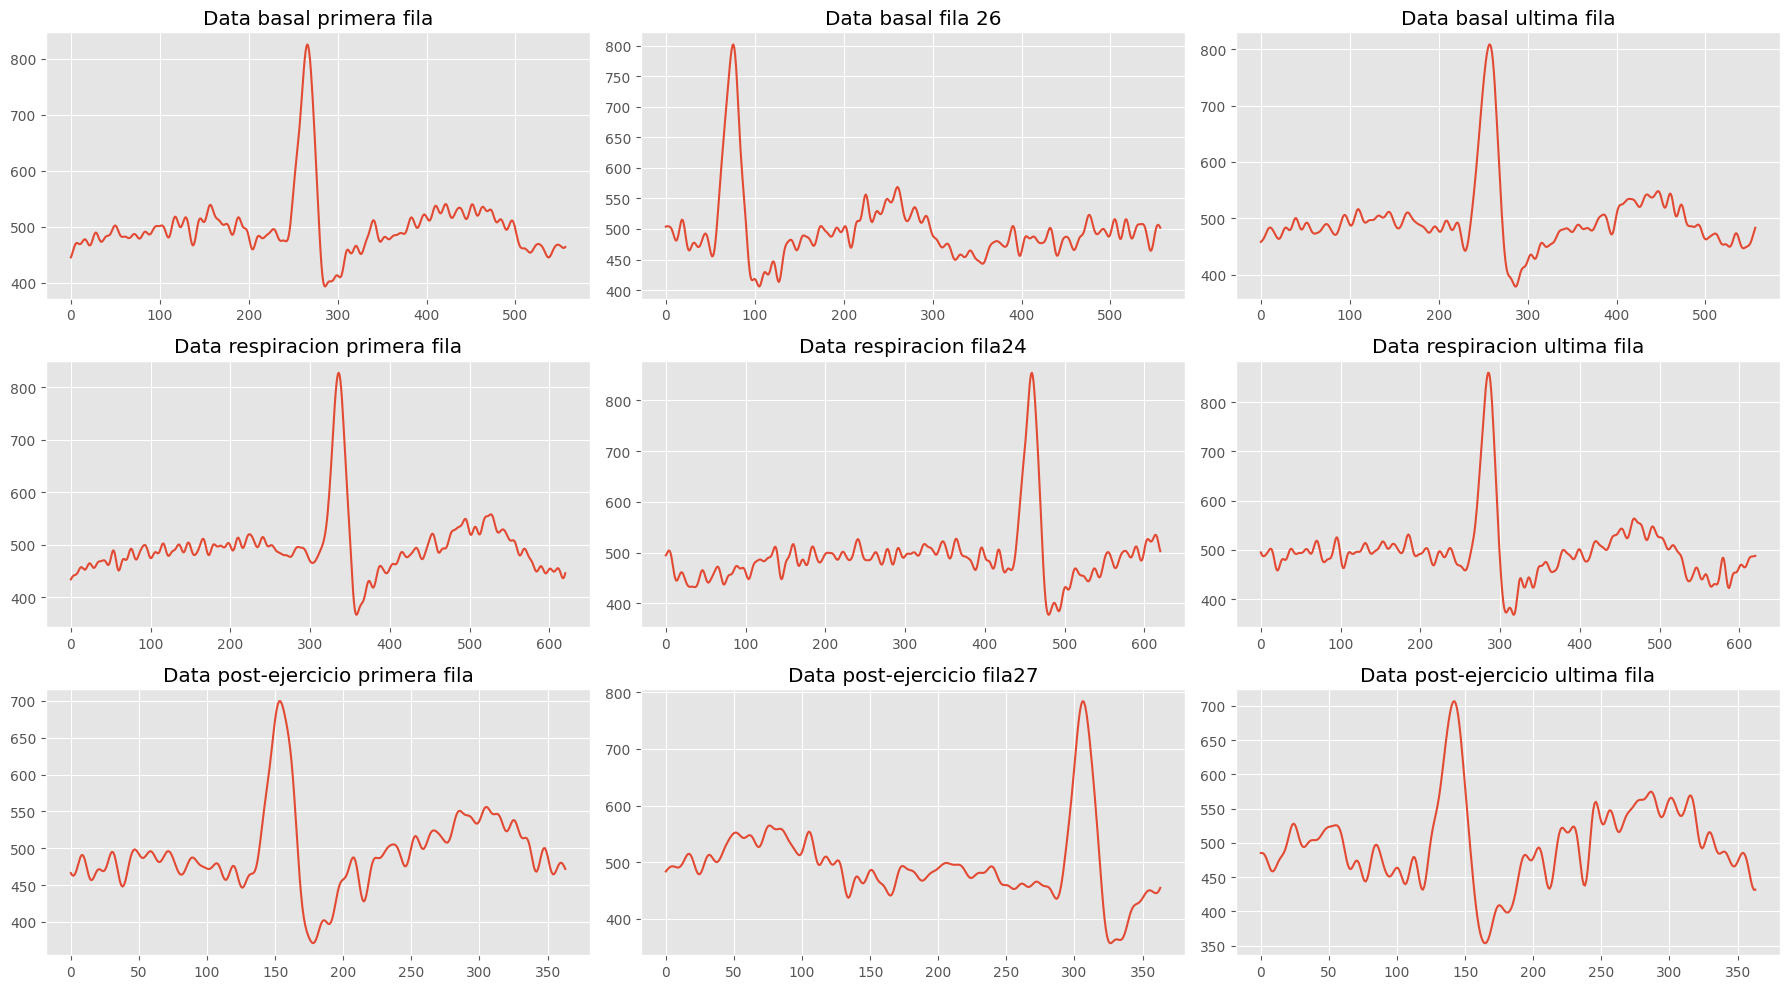

In [ ]:
#Graficamos
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

axs[0, 0].plot(tab_basal[0])
axs[0, 0].set_title('Data basal primera fila')
axs[0, 0].grid(True)

mb = round(x_basal/2)
axs[0, 1].plot(tab_basal[mb])
axs[0, 1].set_title('Data basal fila '+ str(mb))
axs[0, 1].grid(True)

axs[0, 2].plot(tab_basal[x_basal-1])
axs[0, 2].set_title('Data basal ultima fila')
axs[0, 2].grid(True)

axs[1, 0].plot(tab_resp[0])
axs[1, 0].set_title('Data respiracion primera fila')
axs[1, 0].grid(True)

mr = round(x_resp/2)
axs[1, 1].plot(tab_resp[mr])
axs[1, 1].set_title('Data respiracion fila'+str(mr))
axs[1, 1].grid(True)

axs[1, 2].plot(tab_resp[x_resp-1])
axs[1, 2].set_title('Data respiracion ultima fila')
axs[1, 2].grid(True)

axs[2, 0].plot(tab_ejer[0])
axs[2, 0].set_title('Data post-ejercicio primera fila')
axs[2, 0].grid(True)

me = round(x_ejer/2)
axs[2, 1].plot(tab_ejer[round(x_ejer/2)])
axs[2, 1].set_title('Data post-ejercicio fila'+str(me))
axs[2, 1].grid(True)

axs[2, 2].plot(tab_ejer[x_ejer-1])
axs[2, 2].set_title('Data post-ejercicio ultima fila')
axs[2, 2].grid(True)

plt.tight_layout()

## Igualando el numero de datos por fila para las señales de las categorias

In [ ]:
#Calculando el maximo numero de datos de las tres categorias
lst = [y_basal, y_resp, y_ejer]
y_max = max(lst)

#Creando una funcion para agregar el numero que queramos a señal
#n_add = Numero con el que vamos a rellenar cada fila
#n_col = Cuantas veces agregaremos ese numero por fila
def rellenar(n_add, n_col, tab_señal):
    matriz_n_add = np.repeat(n_add, tab_señal.shape[0]*n_col).reshape(-1,n_col)
    rellenado = np.concatenate((tab_señal,  matriz_n_add), axis=1)
    return rellenado

#Definiendo que numero queremos agregar
n_add = 0

#Basal
N_basal = y_max - y_basal
if N_basal == 0:
    basal_final = tab_basal
else:
    #Codigo para completar solamente con ceros
    #zeros_basal = np.zeros((tab_basal.shape[0], N_basal))
    #basal_final = np.concatenate((tab_basal,  zeros_basal), axis=1)
    basal_final = rellenar(n_add, N_basal, tab_basal)

#Respiracion
N_resp = y_max - y_resp
if N_resp == 0:
    resp_final = tab_resp
else:
    #Codigo para completar solamente con ceros
    #zeros_resp = np.zeros((tab_resp.shape[0], N_resp))
    #resp_final = np.concatenate((tab_resp,  zeros_resp), axis=1)
    resp_final = rellenar(n_add, N_resp, tab_resp)

#Post-ejercicio
N_ejer = y_max - y_ejer
if N_ejer == 0:
    ejer_final = tab_ejer
else:
    #Codigo para completar solamente con ceros
    #zeros_ejer = np.zeros((tab_ejer.shape[0], N_ejer))
    #ejer_final = np.concatenate((tab_ejer,  zeros_ejer), axis=1)
    ejer_final = rellenar(n_add, N_ejer, tab_ejer)

### Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Respiracion   | 1   | 
| Post-Ejercicio    | 2   |

In [ ]:
#Creamos una categoría
target_0 = np.repeat(0, basal_final.shape[0])    #Basal = 0
target_1 = np.repeat(1, resp_final.shape[0])     #Respiracion = 1
target_2 = np.repeat(2, ejer_final.shape[0])     #Post-ejercicio = 2

## Creando Dataset

In [ ]:
ecg_data = np.vstack((basal_final, resp_final, ejer_final))
ecg_target = np.concatenate((target_0, target_1, target_2))

ecg_dataset = {"data": ecg_data, "target": ecg_target}
ecg_dataset

{'data': array([[445.38610355, 449.03895086, 454.08879696, ...,   0.        ,
           0.        ,   0.        ],
        [466.29554699, 469.04571289, 471.40362233, ...,   0.        ,
           0.        ,   0.        ],
        [464.48657775, 465.35203463, 467.095686  , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [435.47375085, 416.80983051, 400.99354162, ...,   0.        ,
           0.        ,   0.        ],
        [491.96053106, 504.24962706, 513.03285678, ...,   0.        ,
           0.        ,   0.        ],
        [485.28911553, 485.24728653, 484.36149455, ...,   0.        ,
           0.        ,   0.        ]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 

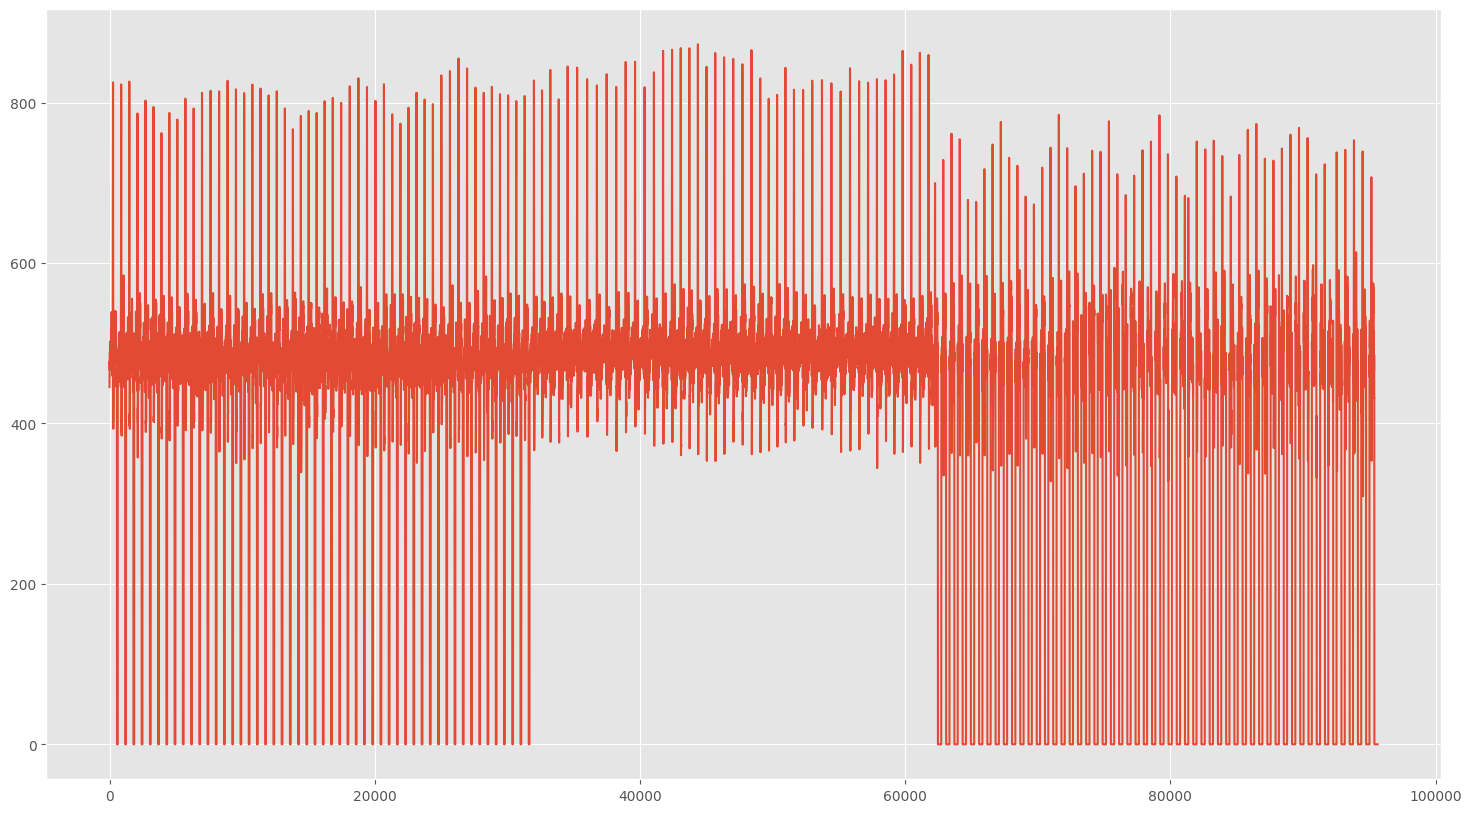

In [ ]:
#Grafica de las 3 categorias juntas
ecg_data_array = ecg_data.flatten()
plt.figure(figsize=(18, 10))
plt.plot(ecg_data_array)
#plt.xlim(31000,32000)